In [18]:
import numpy as np
import scipy
from scipy import ndimage

# Correspondence

## Reconstruction
* Given an image, can we reconstruct the 3D world that created the image?

## Reconstructing the 3D world
* Where are objects in the world located, and how are they oriented?
* What is the shape of the scene?
* Where is the camera in the world located and how is it oriented?

<br>

To understand how to get 3D world from images, ask:<br>
**How do we get the image from the 3D world?**

### Why is reconstruction hard?

### One way out : multiple images
* Multiple images can give a clue about 3D structure
* Parallax: nearby objects move more than far away objects

**Steps**
1. Find *correspondences* between pixels in image 1 and image 2
2. Use correspondences to locate point in 3D

## Reconstruction from correspondence
* Given known cameras, correspondence gives the location of 3D point (*Triangulation*)
* Given a 3D point, correspondence gives relationship between cameras (*Pose estimation / camera calibration*)

## Correspondence can be difficult

## Sparse vs. Dense correspondence
* Sparse correspondence: produce a few, high confidence matches
    * Good enough for estimating pose or relationship between cameras
    * Easier
* Dense correspondence: try to match every pixel
    * Needed if we want 3D location of every pixel

## A general pipeline for sparse correspondence
* **Feature detection**
    * If sparse correspondences are enough, *choose points for which we will search for correspondences (feature points)*
* **Feature description**
    * For each point (or every pixel if dense correspondence), describe point using a *feature descriptor*
* **Feature matching**
    * Find best matching descriptors across two images (*feature matching*)
* Use feature matches to perform downstream task, e.g., pose estimation

## Characteristics of good feature points
* Repeatability
    * The same feature point can be found in several images despite geometric and photometric transformations
* Distinctiveness
    * Each feature point is distinctive
    * Fewer "false" matches

### Goal: repeatability
* We want to detect (at least some of) the same points in both images.
* Yet, we have to be able to run the detection procedure *independently* per image

### Goal: distinctiveness
* The feature point should be distinctive enough that it is easy to match
    * Should *at least* be distinctive from other patches nearby

## The aperture problem
* Corners are distinctive
* How do we define / find corners?

## Corner detection
* Main idea: Translating window should cause large differences in patch appearance

### Corner detection : Basic idea
* We should easily recognize the point by looking through a small window
* Shifting a window in *any direction* should give a *large change* in intensity
    * "Flat" region
        * No change in all directions
    * "Edge"
        * No change along the edge direction
    * "Corner"
        * Significant change in all directions

### Corner detection : the math
* Consider shifting the window $W$ by $(u,v)$
    * How do the pixels in $W$ change?
    * Compare each pixel before and after by summing up the squared differences (SSD)
    * This defines an SSD "error" $E(u,v)$
        * $E(u,v) = \| \phi_0 - \phi_1 \|_2^2$
* Write pixels in window as a vector:
    * $\phi_0 = [I(0,0),I(0,1),...,I(n,n)]$
    * $\phi_1 = [I(0+u,0+v),I(0+u,1+v),...,I(n+u,n+v)]$
    * $E(u,v) = \sum_{(x,y) \in W} [I(x+u,y+v) - I(x,y)]^2$
    * We want $E(u,v)$ to be as *high as possible* for all $u,v$

### Small motion assumption
* Taylor Series expansion of $I$ :
    * $I(x+y, y+v) = I(x,y) + \frac{\partial I}{\partial x}u + \frac{\partial I}{\partial y}v + \text{higher order terms}$
* If the motion $(u,v)$ is small, then first order approximation is good enough
    * $I(x+y, y+v) \approx I(x,y) + \frac{\partial I}{\partial x}u + \frac{\partial I}{\partial y}v \\ \approx I(x,y) + 
    \begin{bmatrix} I_{x} & I_{y} \end{bmatrix}
    \begin{bmatrix} u \\ v \end{bmatrix}$ 
    <br>
    where $I_x = \frac{\partial I}{\partial x}$

The **small motion assumption** gives the error $E(u,v)$ as following:

$E(u,v) = \sum_{(x,y) \in W} [I(x+u,y+v) - I(x,y)]^2 \\
\approx \sum_{(x,y) \in W} [I(x,y) + I_x u + I_y v - I(x,y)]^2 \\
= \sum_{(x,y) \in W} [I_x u + I_y v]^2 \\
= Au^2 + 2Buv + Cv^2 \\
\text{where} ~ A = \sum_{(x,y) \in W} I^2_x, ~ B = \sum_{(x,y) \in W} I_xI_y, ~ C = \sum_{(x,y) \in W} I^2_y
$

In [11]:
a = np.arange(50, step=2).reshape((5,5))
scipy.ndimage.gaussian_filter(a, sigma=1)

array([[ 4,  6,  8,  9, 11],
       [10, 12, 14, 15, 17],
       [20, 22, 24, 25, 27],
       [29, 31, 33, 34, 36],
       [35, 37, 39, 40, 42]])

In [12]:
a

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48]])

In [16]:
a = np.ones((5,5))
scipy.ndimage.gaussian_filter(a, sigma=1)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

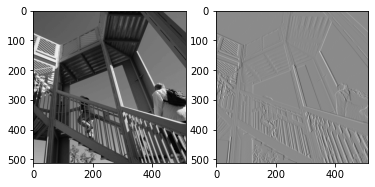

In [19]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.sobel(ascent)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

In [20]:
ndimage.sobel(a)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [21]:
1+ int(4 * 0.5 + 0.5)

3

In [22]:
matrix_h = np.zeros((2,2))

In [24]:
im = scipy.misc.imread('assets/sample_image_01_1.png')
im = im.astype('int32')
dx = ndimage.sobel(im, 0)  # horizontal derivative
dy = ndimage.sobel(im, 1)  # vertical derivative
mag = numpy.hypot(dx, dy)  # magnitude
mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)
scipy.misc.imsave('sobel.jpg', mag)

AttributeError: module 'scipy.misc' has no attribute 'imread'

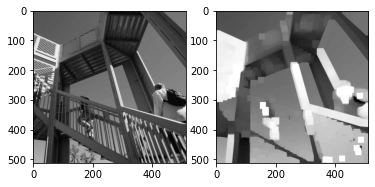

In [25]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.maximum_filter(ascent, size=20)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

In [26]:
result

array([[ 84,  84,  84, ..., 121, 121, 121],
       [ 84,  84,  84, ..., 121, 121, 121],
       [ 84,  84,  84, ..., 121, 121, 121],
       ...,
       [178, 178, 178, ..., 178, 178, 178],
       [178, 178, 178, ..., 178, 178, 178],
       [178, 178, 178, ..., 178, 178, 178]])

## A more general formulation
* Maybe, all pixels in the patch are note equally important
* Consider a "window function" $w(x,y)$ that acts as weights
* $E(u,v) = \sum_{(x,y) \in W} w(x,y)[I(x+u,y+v) - I(x,y)]^2$
* Case till now :
    * $w(x,y) = 1$ inside the window, $0$ otherwise

## Using the window function
* Change in appearance of window $w(x,y)$ for the shift $[u,v]$:
    * $E(u,v) = \sum_{(x,y) \in W} w(x,y)[I(x+u,y+v) - I(x,y)]^2$
        * $w(x,y)$ : Window function
            * 1 in window, 0 outside
            * Gaussian
        * $I(x+u,y+v)$ : Shifted intensity
        * $I(x,y)$ : Intensity

## Redoing the derivation using a window function

$E(u,v) = \sum_{(x,y) \in W} w(x,y)[I(x+u,y+v) - I(x,y)]^2 \\
\approx \sum_{(x,y) \in W} w(x,y)[I(x,y) + I_x u + I_y v - I(x,y)]^2 \\
= \sum_{(x,y) \in W} w(x,y)[I_x u + I_y v]^2 \\
= Au^2 + 2Buv + Cv^2 \\
\text{where} ~ A = \sum_{(x,y) \in W} w(x,y)I^2_x, ~ B = \sum_{(x,y) \in W} w(x,y)I_xI_y, ~ C = \sum_{(x,y) \in W} w(x,y)I^2_y
$

## The second moment matrix
$E(u,v) \approx 
\begin{bmatrix} u & v \end{bmatrix}
\begin{bmatrix} A & B \\ B & C \end{bmatrix}
\begin{bmatrix} u \\ v \end{bmatrix}$
, where

$\begin{bmatrix} A & B \\ B & C \end{bmatrix} = M \\= \sum_{x,y \in W} w(x,y)\begin{bmatrix} I_x(x,y)^2 & I_x(x,y)I_y(x,y) \\ I_x(x,y)I_y(x,y) & I_y(x,y)^2 \end{bmatrix} \\
= \sum_{x,y \in W} w(x,y)\begin{bmatrix} I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix}$


* Here, $M$ is called the 'Second moment matrix'
* Recall that we want $E(u,v)$ to be as large as possible for all $u,v$
* What does this mean in terms of $M$?

## Harris detector
* Second moment matrix for color images
* Same derivation yields a different second moment matrix:
    * $M = \sum_{x,y,c \in W} w(x,y)\begin{bmatrix} I_x(x,y,c)^2 & I_x(x,y,c)I_y(x,y,c) \\ I_x(x,y,c)I_y(x,y,c) & I_y(x,y,c)^2 \end{bmatrix}$

# Feature Detector Invariance